In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow
import pandas as pd

In [9]:
titanicdf = pd.read_csv("data/train.csv")

#From the Data Science Section:
def get_title(name): # can look at titanic.py to see my version of this function
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
def replace_titles(x): #basically grouping the titles together
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ["Jonkheer","Don",'the Countess', 'Dona', 'Lady',"Sir"]:
        return 'Royalty'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title
titanicdf['Title'] = titanicdf['Name'].map(lambda x: get_title(x)) #can also use for loop and the append function to get the same effect :)


titanicdf['Title'] = titanicdf.apply(replace_titles, axis=1) #the apply function applies a certain command on all values within a list/column
titanicdf['Age'].fillna(titanicdf['Age'].median(), inplace=True)
titanicdf['Fare'].fillna(titanicdf['Fare'].median(), inplace=True)
titanicdf['Embarked'].fillna("S", inplace=True)
titanicdf.drop("Cabin", axis=1, inplace=True)
titanicdf.drop("Ticket", axis=1, inplace=True)
titanicdf.drop("Name", axis=1, inplace=True)
#converting string values into numbers for machine learning model
titanicdf.Sex.replace(('male','female'), (0,1), inplace = True)
titanicdf.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
titanicdf.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace = True)


In [10]:
#REVIEW OF ML STUFF

#splitting data into training and validation
y_var = titanicdf['Survived']

#for independent variable we want to use all columns except the columns for passenger id and people who survived
# axis = 1 means a particular column. axis= 0 means a particular row
x_var = titanicdf.drop(['PassengerId', 'Survived'], axis = 1)

#spliting data into testing and training data!!!
from sklearn.model_selection import train_test_split

# must split in this format
# test_size = percent of data that will be the x_test and y_test. the remaining will become x_train and y_train
#random_state shuffles the data before performing the split. this is not necessary to be done but is helpful
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.1)

#developing a random forrest to help the computer make predictions
import pickle # useful in saving model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score #this allows the programmer to see the accuracy of the model

randforest = RandomForestClassifier() #storing the random forest classifier model into a variable
randforest.fit(x_train, y_train) # here the computer is going to train the random forest model using the x_train and y_train data sets

#getting accuracy score

#step 1: getting the y_predictions
titanic_y_predictions = randforest.predict(x_test)

#step2: comparing the predictions with the y_test data
#round function: round(value, num decimal places to round to)
acc_score = round(accuracy_score(titanic_y_predictions, y_test) * 100, 2)
print("Accuracy Score: ", acc_score)


Accuracy Score:  85.56


7
Epoch 323/520
17/17 - 0s - loss: 0.3671 - accuracy: 0.8487 - val_loss: 0.3270 - val_accuracy: 0.8667
Epoch 324/520
17/17 - 0s - loss: 0.3639 - accuracy: 0.8475 - val_loss: 0.3123 - val_accuracy: 0.8667
Epoch 325/520
17/17 - 0s - loss: 0.3671 - accuracy: 0.8463 - val_loss: 0.3249 - val_accuracy: 0.8667
Epoch 326/520
17/17 - 0s - loss: 0.3824 - accuracy: 0.8262 - val_loss: 0.3253 - val_accuracy: 0.8667
Epoch 327/520
17/17 - 0s - loss: 0.3570 - accuracy: 0.8475 - val_loss: 0.3232 - val_accuracy: 0.8667
Epoch 328/520
17/17 - 0s - loss: 0.3712 - accuracy: 0.8558 - val_loss: 0.3294 - val_accuracy: 0.8667
Epoch 329/520
17/17 - 0s - loss: 0.3683 - accuracy: 0.8416 - val_loss: 0.3319 - val_accuracy: 0.8667
Epoch 330/520
17/17 - 0s - loss: 0.3640 - accuracy: 0.8463 - val_loss: 0.3245 - val_accuracy: 0.8667
Epoch 331/520
17/17 - 0s - loss: 0.3693 - accuracy: 0.8511 - val_loss: 0.3305 - val_accuracy: 0.8667
Epoch 332/520
17/17 - 0s - loss: 0.3743 - accuracy: 0.8428 - val_loss: 0.3232 - val_accur

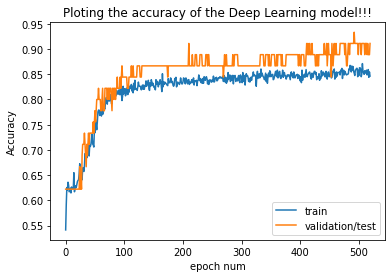

In [11]:
# developing deep learning model
model = Sequential()
# Dense(#nodes, "activation function(to add non-linearity)", #input_shape= (number of independent variables))
# the add() function adds the nodes features to the deep learning architecture
model.add(Dense(32, activation= 'relu', input_shape= (8,))) #This is 1 hidden layer. after 1st hidden layer, you do not need to add "input_shape()"
model.add(Dropout(rate= 0.15))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(rate= 0.15))
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(rate= 0.2))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(rate= 0.2))
model.add(Dense(32, activation= 'relu'))
model.add(Dropout(rate= 0.15))
model.add(Dense(5, activation= 'relu'))

#output layer
model.add(Dense(1, activation= 'sigmoid')) #want 1 node because there should be 1 output

#compiling the model
# What we need to use for backwards propagation, how to calculate loss, what else do we want the model to calculate(metrics).

model.compile(optimizer= 'adam', loss='binary_crossentropy',  metrics= ['accuracy'])

#training the model
dlmodel =model.fit(x_var, y_var, epochs= 520, batch_size= 50, verbose= 2, validation_split=0.05)# keras does the train and test split



plt.plot(dlmodel.history['accuracy'], label= 'train')
plt.plot(dlmodel.history['val_accuracy'], label= 'validation/test')
plt.title('Ploting the accuracy of the Deep Learning model!!!')
plt.xlabel('epoch num')
plt.ylabel('Accuracy')
plt.legend(loc= 'lower right')
plt.show()

In [12]:
#saving the model
model.save('titanic_dl_model.h5')

In [14]:
#how to develop predictions from the Deep learning model
import numpy as np
from keras.models import load_model
predictions = load_model('titanic_dl_model.h5')
x_values = [[1, 1, 30, 2, 2, 50, 1, 2]] #needs to be a 2d array(similarly to the ml model)
result = predictions.predict(x_values)
print('Prediction:',result) # <-- Says how likely the person survived
if(result < 0.5):
    print("Person did not survive")
elif(result >= 0.5 and result < 0.6):
    print('Person may or may not have survived(Unsure)')
else:
    print('Person survived')


Prediction: [[0.51148665]]
Person may or may not have survived(Unsure)
